# Homework 10: Model selection

This homework is designed to give you practice implementing model selection techniques, including best subset selection and forward/backward stepwise selection.

You won't need to load in any data for this homework, we will be simulating our own.

---
## 1. Best subset selection (4 points)

In this question, we will first generate simulated data, and then use it to perform best subset selection.

a) Use `rnorm()` to generate a dataset including a predictor $X$ of length $n = 100$ and a noise vector $\epsilon$ of length $n = 100$. Generate data for a response variable $Y$ of length $n = 100$ according to the model

$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

where $\beta_0$, $\beta_1$, $\beta_2$, and $\beta_3$ are constants of your choice.


In [35]:
x = rnorm(100)
e = rnorm(100)
y = 1 + 2*x + 3*x^2 + 3*x^3 + e
dat = data.frame(x=x,y=y,e=e,x2=x^2,x3=x^3,x4=x^4,x5=x^5,x6=x^6,x7=x^7,x8=x^8,x9=x^9,x10=x^10)
head(dat)


,x,y,e,x2,x3,x4,x5,x6,x7,x8,x9,x10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.0006939546,1.6351849,0.63657140,4.815730e-07,-3.341898e-10,2.319126e-13,-1.609368e-16,1.116828e-19,-7.750283e-23,5.378345e-26,-3.732327e-29,2.590066e-32
2,1.2519719104,14.8500538,0.75666021,1.567434e+00,1.962383e+00,2.456848e+00,3.075905e+00,3.850947e+00,4.821277e+00,6.036104e+00,7.557032e+00,9.461192e+00
3,0.0989746221,-0.2634199,-1.49366576,9.795976e-03,9.695530e-04,9.596114e-05,9.497718e-06,9.400330e-07,9.303941e-08,9.208541e-09,9.114118e-10,9.020664e-11
4,-0.3469086280,0.7776435,0.23567072,1.203456e-01,-4.174893e-02,1.448306e-02,-5.024299e-03,1.742973e-03,-6.046523e-04,2.097591e-04,-7.276724e-05,2.524358e-05
5,0.2133190516,0.1062851,-1.48598937,4.550502e-02,9.707087e-03,2.070707e-03,4.417212e-04,9.422754e-05,2.010053e-05,4.287826e-06,9.146750e-07,1.951176e-07
6,1.0824291052,10.5588471,0.07433739,1.171653e+00,1.268231e+00,1.372770e+00,1.485926e+00,1.608410e+00,1.740990e+00,1.884498e+00,2.039836e+00,2.207977e+00


b) Use `regsubsets()` to perform best subset selection to determine the best model that contains the predictor variables $X$, $X^2$, . . . , $X^{10}$. Print the model summary.

For this you will need to install and load the _leaps_ library.

In [41]:
install.packages("leaps")
library(leaps)
library(tidyverse)

regfit.full = regsubsets(y~.,select(dat,-e),nvmax=10)
reg.summary = summary(regfit.full)
reg.summary


The downloaded binary packages are in
	/var/folders/m4/6fskllfx0fd1y5g7qkdx7q2h0000gn/T//RtmpSGvAhI/downloaded_packages


Subset selection object
Call: regsubsets.formula(y ~ ., select(dat, -e), nvmax = 10)
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: exhaustive
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " "*"
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" "*" "*"
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "*" "*" "*" "*" "*" 

In [37]:

# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

ERROR: Error in parse(text = x, srcfile = src): attempt to use zero-length variable name


c) Plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Which is the best model? Report the coefficients of the best model. 

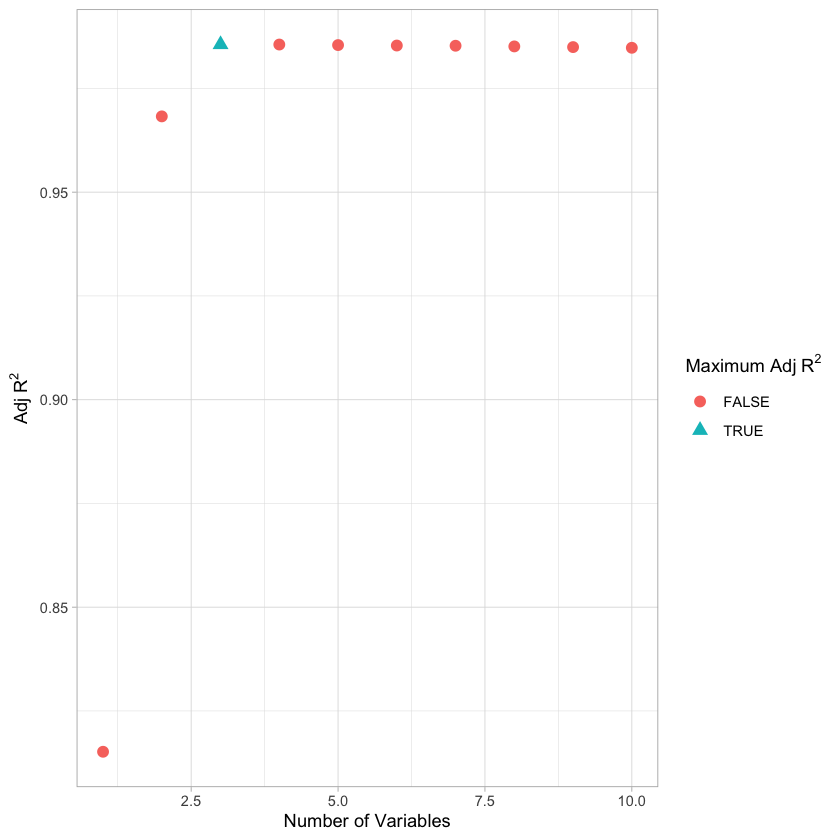

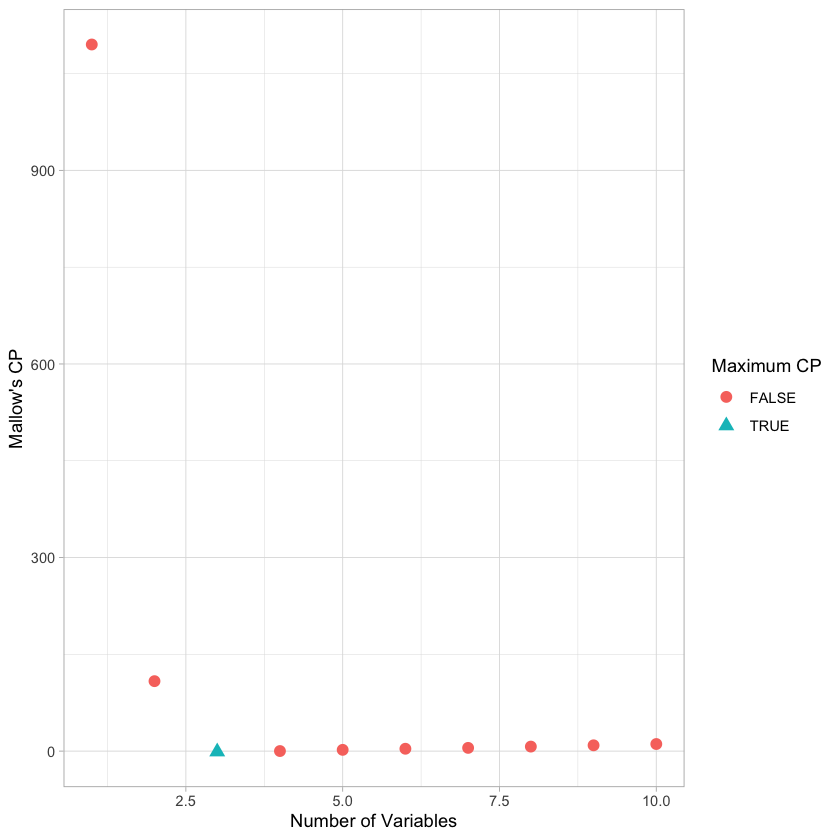

[1] 3

[1] 3

[1] 3

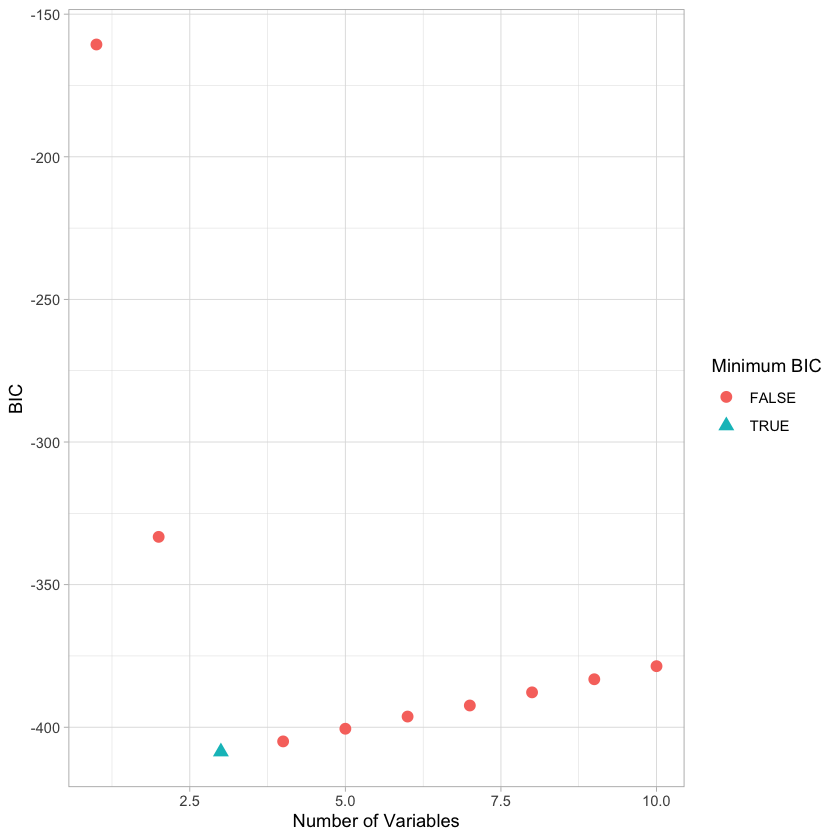


Call:
lm(formula = y ~ x + x2 + x3, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86615 -0.67753  0.04109  0.72322  2.33313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95952    0.12190   7.871 5.32e-12 ***
x            1.88760    0.17411  10.842  < 2e-16 ***
x2           3.12786    0.11541  27.102  < 2e-16 ***
x3           3.00993    0.06772  44.444  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.947 on 96 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9856 
F-statistic:  2257 on 3 and 96 DF,  p-value: < 2.2e-16


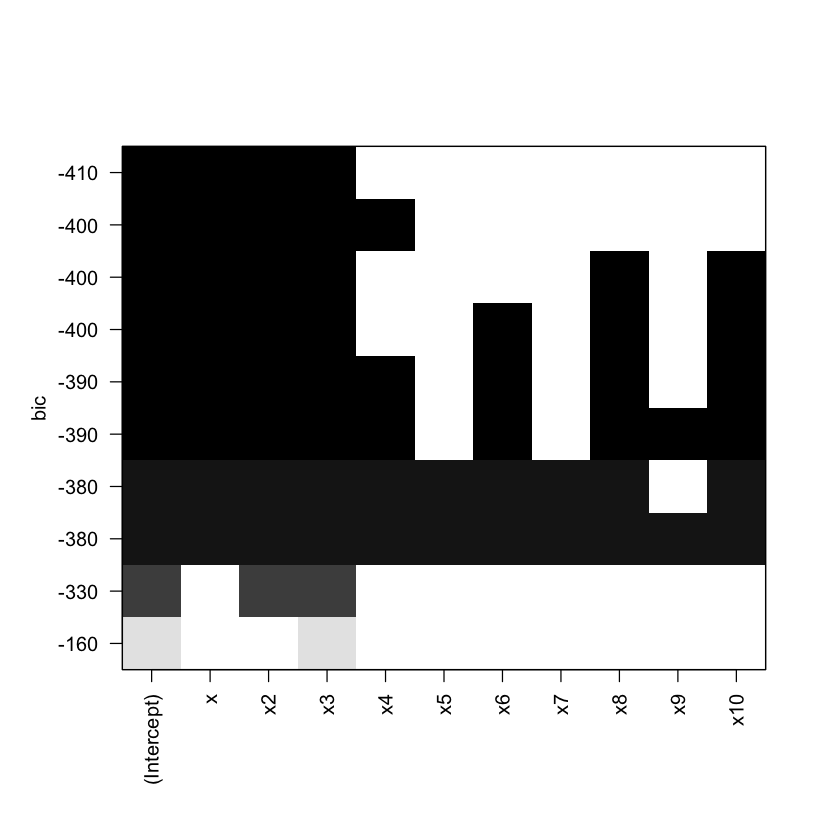

In [57]:
numvar = 1:length(reg.summary$rss)# Make a vector that lists the number of variables in sequence
allfalse = rep(FALSE,length(reg.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- reg.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(reg.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- reg.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(reg.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- reg.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(reg.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.max(reg.summary$adjr2)
which.min(reg.summary$bic) 
which.min(reg.summary$cp)

plot(regfit.full, scale="bic")
lm.fit = lm(y~x+x2+x3,dat)
summary(lm.fit)

> 
> According to all three bias-adjusted metrics, the best model is the one with three variables, namely where x, x2, and x3 are included. The coefficients are 1.88, 3.13, and 3.01 respectively for x, x2, and x3; intercept is 0.96. This result aligns decently well with the simulated data formula. 

---
## 2. Forward and backwards stepwise selection (3 points)

Using the same simulated data from question 1, use forward stepwise selection, and backwards stepwise selections to determine the best model. Again, for both model selection methods, plot the Mallows' Cp, Bayesian Information Criteria (BIC) and the adjusted coefficient of determination, $R^2$, for each model tested. Report the coefficients of the best model. 

a) Forward stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., select(dat, -e), nvmax = 10, method = "forward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: forward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" "*" " " " " " " " " " " " "
5  ( 1 )  "*" "*" "*" "*" "*" " " " " " " " " " "
6  ( 1 )  "*" "*" "*" "*" "*" " " " " " " "*" " "
7  ( 1 )  "*" "*" "*" "*" "*" " " " " "*" "*" " "
8  ( 1 )  "*" "*" "*" "*" "*" " " "*" "*" "*" " "
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" "*" " "
10  ( 1 ) "*" "*" "*" "*" "*"

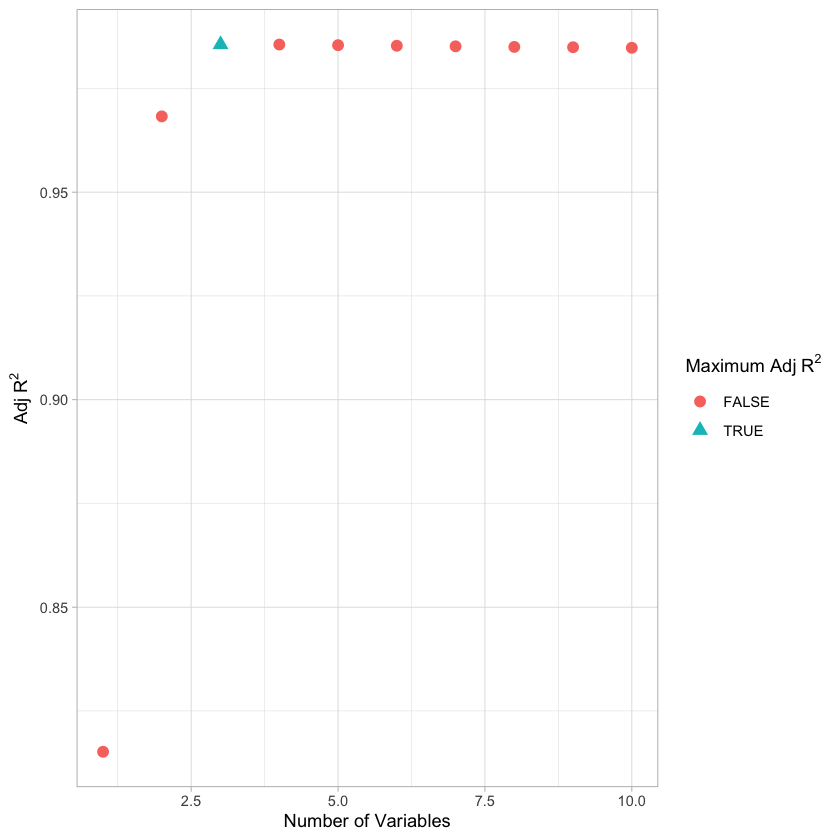

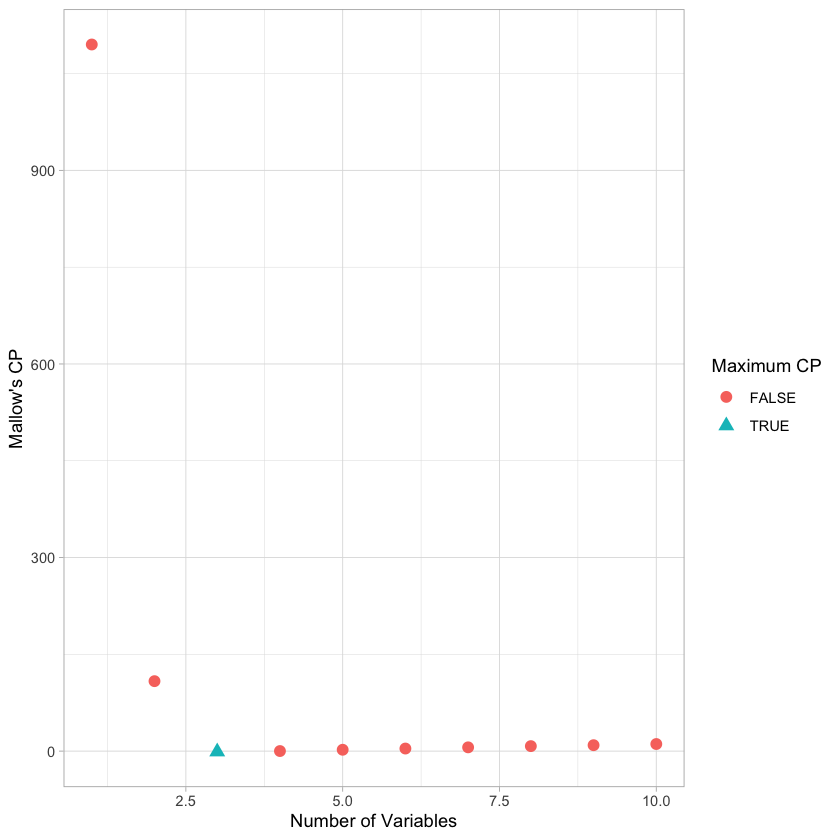

[1] 3

[1] 3

[1] 3

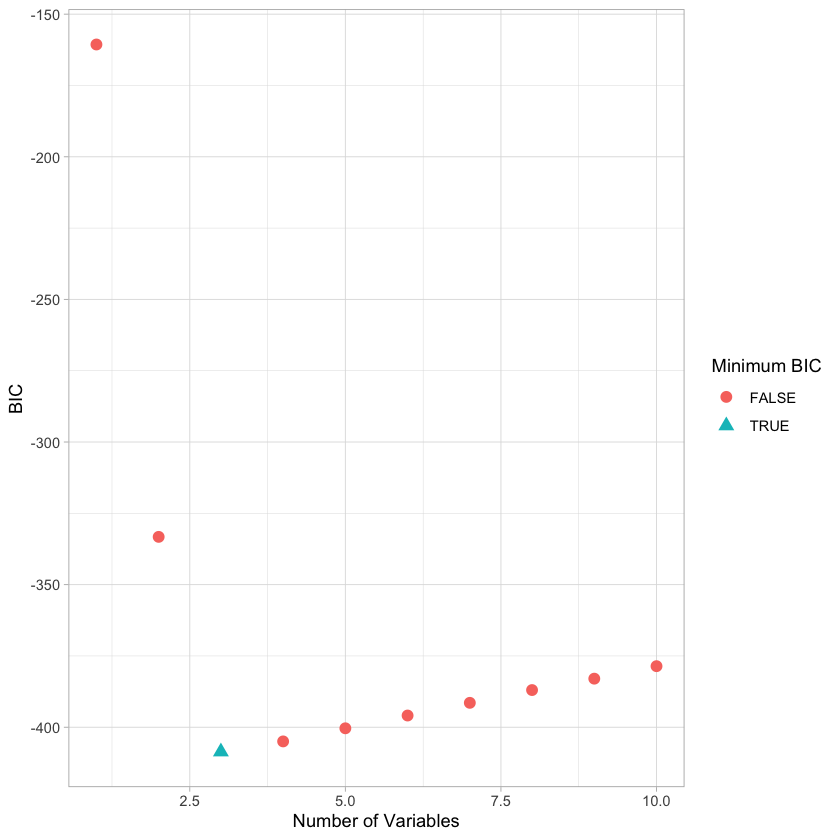


Call:
lm(formula = y ~ x + x2 + x3, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86615 -0.67753  0.04109  0.72322  2.33313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95952    0.12190   7.871 5.32e-12 ***
x            1.88760    0.17411  10.842  < 2e-16 ***
x2           3.12786    0.11541  27.102  < 2e-16 ***
x3           3.00993    0.06772  44.444  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.947 on 96 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9856 
F-statistic:  2257 on 3 and 96 DF,  p-value: < 2.2e-16


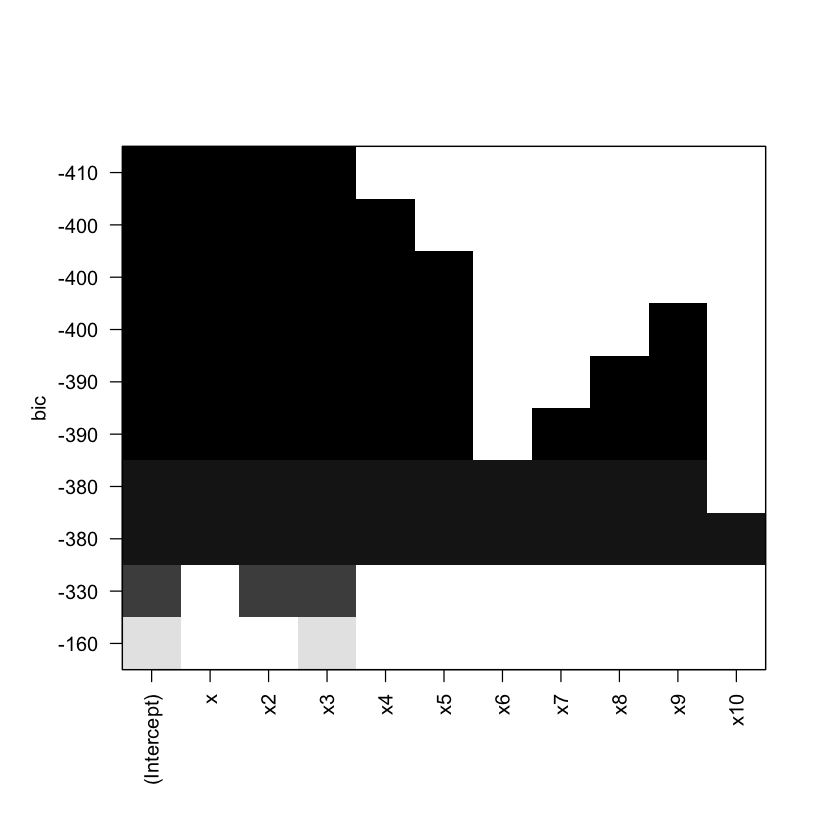

In [55]:
regfit.f = regsubsets(y~., select(dat,-e), nvmax=10, method="forward") 
regf.summary = summary(regfit.f)
regf.summary

numvar = 1:length(regf.summary$rss)# Make a vector that lists the number of variables in sequence
allfalse = rep(FALSE,length(regf.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regf.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regf.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- regf.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(regf.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- regf.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regf.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.max(regf.summary$adjr2)
which.min(regf.summary$bic) 
which.min(regf.summary$cp)

plot(regfit.f, scale="bic")
lm.f = lm(y~x+x2+x3,dat)
summary(lm.f)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

b) Backwards stepwise selection:

Subset selection object
Call: regsubsets.formula(y ~ ., select(dat, -e), nvmax = 10, method = "backward")
10 Variables  (and intercept)
    Forced in Forced out
x       FALSE      FALSE
x2      FALSE      FALSE
x3      FALSE      FALSE
x4      FALSE      FALSE
x5      FALSE      FALSE
x6      FALSE      FALSE
x7      FALSE      FALSE
x8      FALSE      FALSE
x9      FALSE      FALSE
x10     FALSE      FALSE
1 subsets of each size up to 10
Selection Algorithm: backward
          x   x2  x3  x4  x5  x6  x7  x8  x9  x10
1  ( 1 )  " " " " "*" " " " " " " " " " " " " " "
2  ( 1 )  " " "*" "*" " " " " " " " " " " " " " "
3  ( 1 )  "*" "*" "*" " " " " " " " " " " " " " "
4  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " " "
5  ( 1 )  "*" "*" "*" " " " " " " " " "*" " " "*"
6  ( 1 )  "*" "*" "*" " " " " "*" " " "*" " " "*"
7  ( 1 )  "*" "*" "*" "*" " " "*" " " "*" " " "*"
8  ( 1 )  "*" "*" "*" "*" " " "*" "*" "*" " " "*"
9  ( 1 )  "*" "*" "*" "*" "*" "*" "*" "*" " " "*"
10  ( 1 ) "*" "*" "*" "*" "

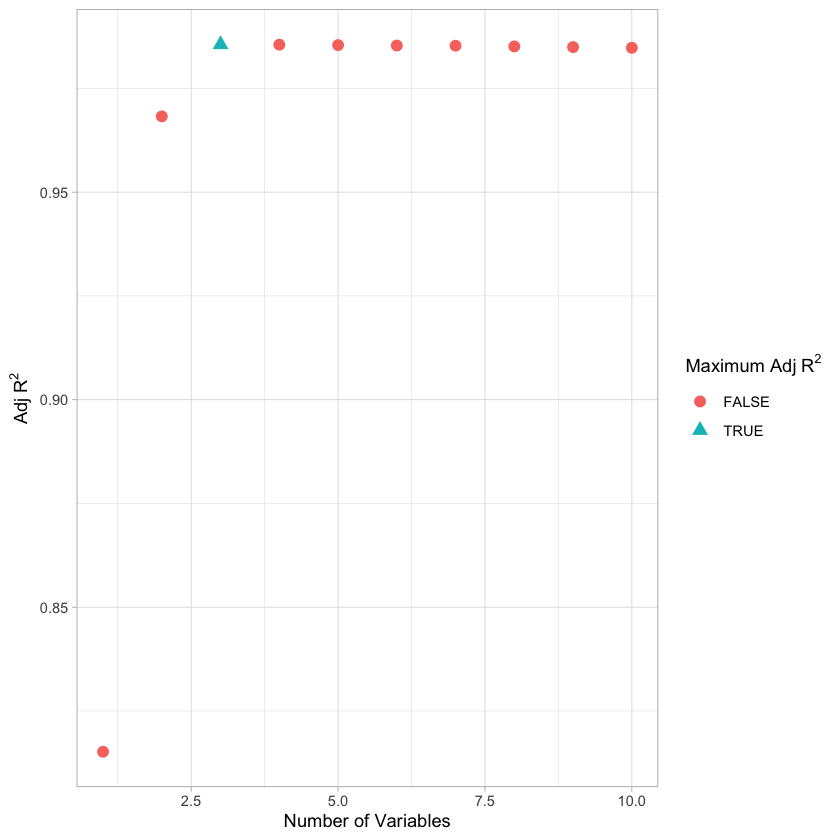

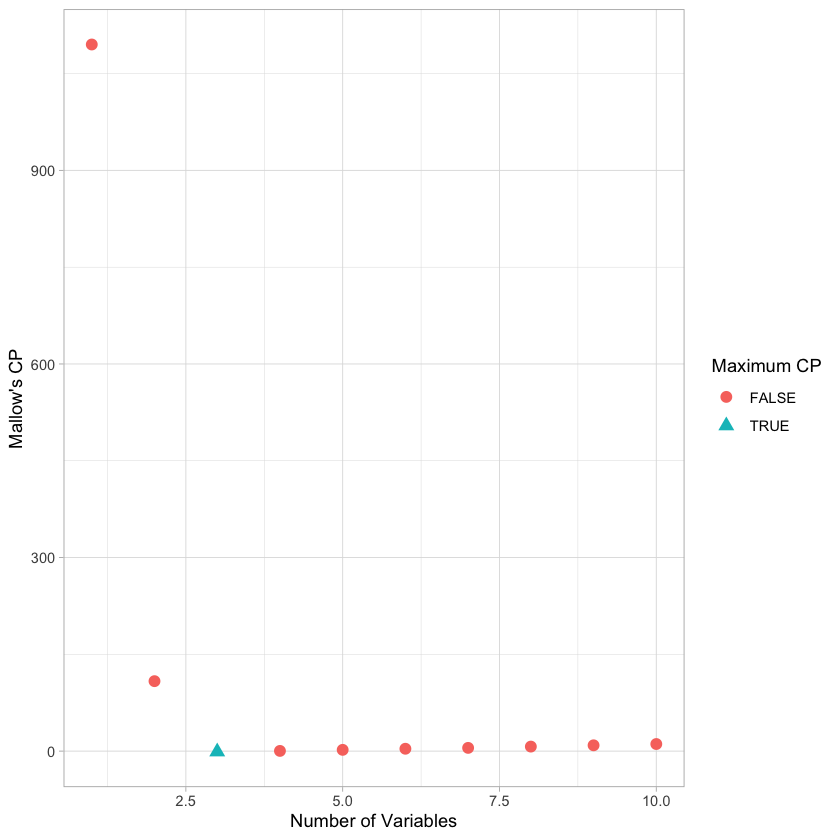

[1] 3

[1] 3

[1] 3

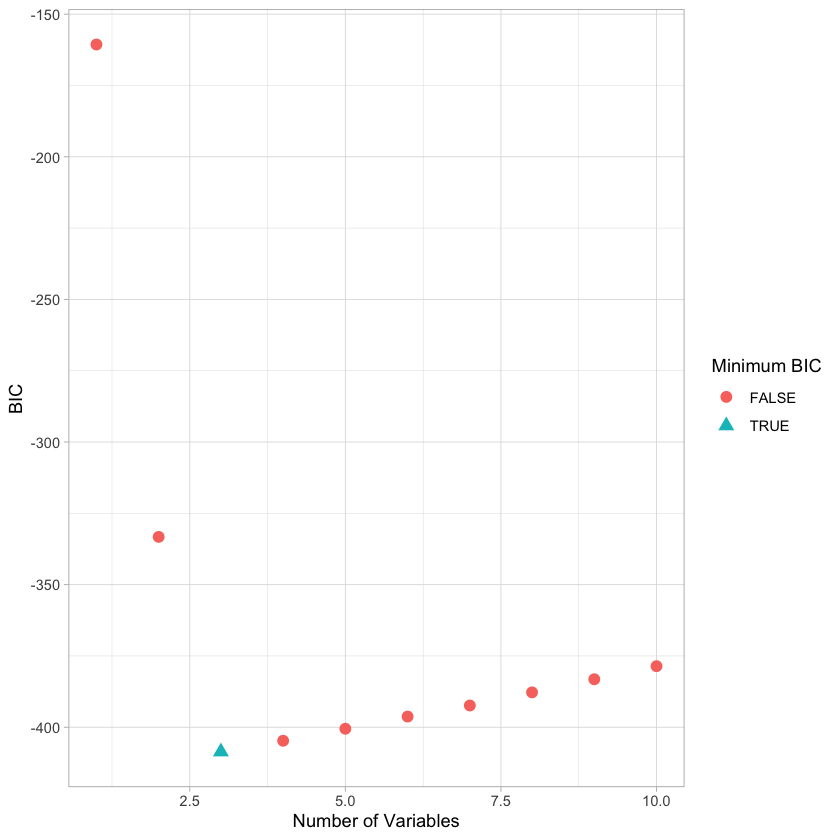


Call:
lm(formula = y ~ x + x2 + x3, data = dat)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.86615 -0.67753  0.04109  0.72322  2.33313 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.95952    0.12190   7.871 5.32e-12 ***
x            1.88760    0.17411  10.842  < 2e-16 ***
x2           3.12786    0.11541  27.102  < 2e-16 ***
x3           3.00993    0.06772  44.444  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.947 on 96 degrees of freedom
Multiple R-squared:  0.986,	Adjusted R-squared:  0.9856 
F-statistic:  2257 on 3 and 96 DF,  p-value: < 2.2e-16


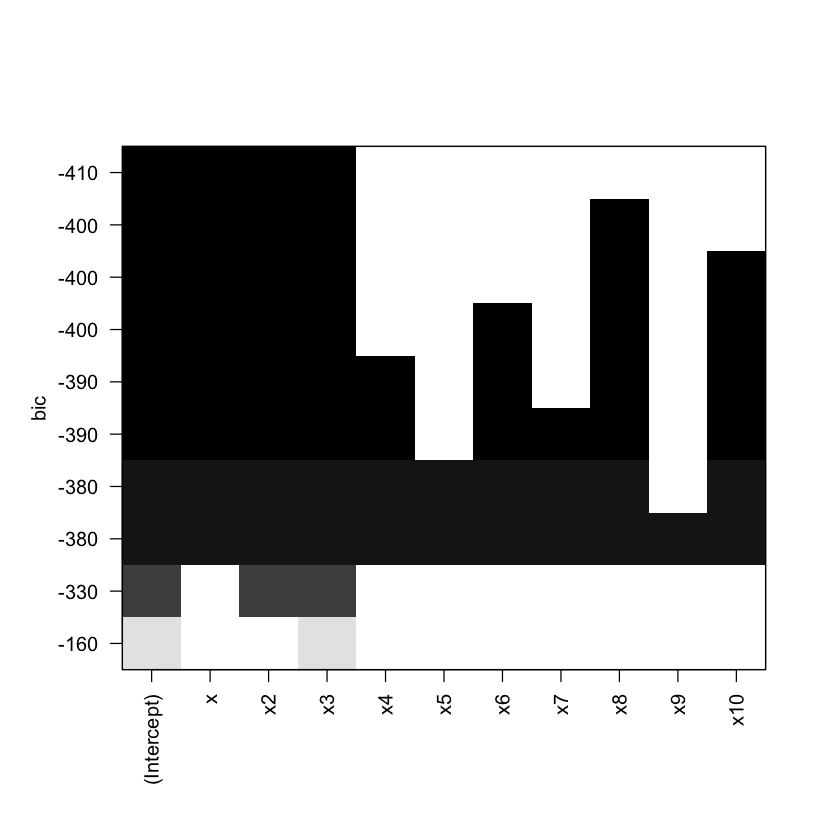

In [56]:
regfit.b = regsubsets(y~., select(dat,-e), nvmax=10, method = "backward") 
regb.summary = summary(regfit.b)
regb.summary

numvar = 1:length(regb.summary$rss)# Make a vector that lists the number of variables in sequence
allfalse = rep(FALSE,length(regb.summary$rss))# Starting point for an indicator that marks the best model choice for each metric.

#adjr2
adjr2.df <- data.frame(numvar = numvar, adjr2 <- regb.summary$adjr2, maxadjr2 <- allfalse)
adjr2.df$maxadjr2[which.max(regb.summary$adjr2)] <- TRUE
ggplot(adjr2.df,aes(x=numvar,y=adjr2,shape=maxadjr2,col=maxadjr2)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = 'Adj'~R^2, color='Maximum Adj'~R^2, shape='Maximum Adj'~R^2)

# #mallow's cp
cp.df <- data.frame(numvar = numvar, cp <- regb.summary$cp, mincp <- allfalse)
cp.df$mincp[which.min(regb.summary$cp)] <- TRUE
ggplot(cp.df,aes(x=numvar,y=cp,shape=mincp,col=mincp)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "Mallow's CP", color="Maximum CP", shape="Maximum CP")

#bic
bic.df <- data.frame(numvar = numvar,bic <- regb.summary$bic, minbic <- allfalse)
bic.df$minbic[which.min(regb.summary$bic)] <- TRUE
ggplot(bic.df,aes(x=numvar,y=bic,shape=minbic,col=minbic)) + 
    geom_point(size=3) + theme_light() + 
    labs(x = "Number of Variables", y = "BIC", color="Minimum BIC", shape="Minimum BIC")

which.max(regb.summary$adjr2)
which.min(regb.summary$bic) 
which.min(regb.summary$cp)

plot(regfit.b, scale="bic")
lm.b = lm(y~x+x2+x3,dat)
summary(lm.b)

In [ ]:
# Note: if your model summary doesn't show up when viewing your notebook on github, copy and paste the output below.
# Otherwise you can either delete this cell or leave it blank.

```
# paste here

```

c) Compare your results from parts a and b with those of question 1.

> We see a difference among the three models beyond the three-variable model as we used three variable (x, x2, and x3) to generate y. For four-variable model, backward selection ended up with x8  in addititon to the three and both exhaustive and forward methods included x4 instead. On the other side, when the model included nine variables, exhaustive and backward methods excluded x9, while forward method excluded x10. 
> 

---
## 3. Training and test error (3 points)

This question will explore the relationship between training and test error and the number of features included in a model. We will again use a simulated dataset. 

a) Simulate dataset with features $p = 20$ and observations $n = 1,000$. Generate data for a response variable $Y$ according to the model

$Y = X\beta + \epsilon$ 

where $\beta$ is random with some elements that are exactly zero.

Split your simulated dataset into a training set containing $n=100$ observations and a test set containing $n=900$ observations.

In [82]:
b=rnorm(1000)
toZero = sample(x = 1000, size = 85)
b[toZero] = 0
e=rnorm(1000)
c=rnorm(1000,921,9)
d=rnorm(1000,970,2)
z=rnorm(1000,899,5)
f=rnorm(1000,617,1)
g=rnorm(1000,618,10)
h=rnorm(1000,890,9)
i=rnorm(1000,954,4)
j=rnorm(1000,572,3)
k=rnorm(1000,260,10)
l=rnorm(1000,697,98)
o=rnorm(1000,373,76)
p=rnorm(1000,948,38)
q=rnorm(1000,310,62)
r=rnorm(1000,918,69)
s=rnorm(1000,91,343)
t=rnorm(1000,677,66)
u=rnorm(1000,109,235)
v=rnorm(1000,508,43)
w=rnorm(1000,949,308)
x=rnorm(1000,383,278)

y=x*b+e

df = data.frame(x=x,y=y,c=c,d=d,z=z,f=f,g=g,h=h,i=i,j=j,k=k,l=l,o=o,p=p,q=q,r=r,s=s,t=t,u=u,v=v,w=w)
head(df)

train=sample(x = 1000, size = 100)


,x,y,c,d,z,f,g,h,i,j,⋯,l,o,p,q,r,s,t,u,v,w
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,434.46917,65.6288016,927.3860,969.5152,894.9871,618.6359,623.7355,904.8305,958.5188,571.4165,⋯,640.4221,237.2048,958.3877,331.3622,905.9749,-206.52594,757.5724,-5.420209,533.9698,1027.0380
2,146.01868,-146.8866792,939.2902,971.4525,886.8356,617.0760,645.2945,909.0601,950.9335,570.8527,⋯,644.4638,349.5716,1046.1282,319.1109,896.2495,180.24263,708.7203,-125.961163,418.9806,1327.6235
3,162.50989,79.1221451,911.9615,971.4912,901.1586,616.2155,613.8368,886.6599,946.6933,576.2150,⋯,689.6276,278.7459,896.9239,261.5658,947.1653,-60.82482,637.5507,-213.985335,456.6799,780.7348
4,-57.52779,17.9425682,921.3885,968.5658,896.2327,615.9071,620.4200,894.7993,954.6217,571.6923,⋯,578.2241,372.7415,956.8422,443.9421,790.7309,-447.41363,685.9429,441.000583,455.8136,980.9530
5,344.12181,0.5533088,938.5697,969.1580,901.5435,616.2145,612.3754,893.5943,953.1861,572.8623,⋯,708.4896,451.5728,895.8275,329.1375,884.3975,168.23180,586.2503,404.380265,474.7520,1280.8792
6,730.89129,130.6560470,923.0792,973.1546,903.0327,616.2677,632.0953,888.7628,951.4340,571.8012,⋯,704.3493,447.5760,1006.5393,213.4305,860.1380,509.44902,674.1957,164.017213,475.7894,859.4126


b) Perform best subset selection on the training set, and plot the associated training and test set MSE for the best model of each size.

Subset selection object
Call: regsubsets.formula(y ~ ., df, subset = train, nvmax = 20)
20 Variables  (and intercept)
  Forced in Forced out
x     FALSE      FALSE
c     FALSE      FALSE
d     FALSE      FALSE
z     FALSE      FALSE
f     FALSE      FALSE
g     FALSE      FALSE
h     FALSE      FALSE
i     FALSE      FALSE
j     FALSE      FALSE
k     FALSE      FALSE
l     FALSE      FALSE
o     FALSE      FALSE
p     FALSE      FALSE
q     FALSE      FALSE
r     FALSE      FALSE
s     FALSE      FALSE
t     FALSE      FALSE
u     FALSE      FALSE
v     FALSE      FALSE
w     FALSE      FALSE
1 subsets of each size up to 20
Selection Algorithm: exhaustive
          x   c   d   z   f   g   h   i   j   k   l   o   p   q   r   s   t  
1  ( 1 )  "*" " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " " "
2  ( 1 )  "*" " " " " " " "*" " " " " " " " " " " " " " " " " " " " " " " " "
3  ( 1 )  "*" " " " " " " "*" " " " " " " " " " " " " " " " " " " " " "*" " "
4  ( 1 )  "*" " " " " "

,(Intercept),x,c,d,z,f,g,h,i,j,⋯,l,o,p,q,r,s,t,u,v,w
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE
4,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
5,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,FALSE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
6,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
7,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE
8,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE
9,TRUE,TRUE,FALSE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE
10,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,FALSE,⋯,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,TRUE,FALSE


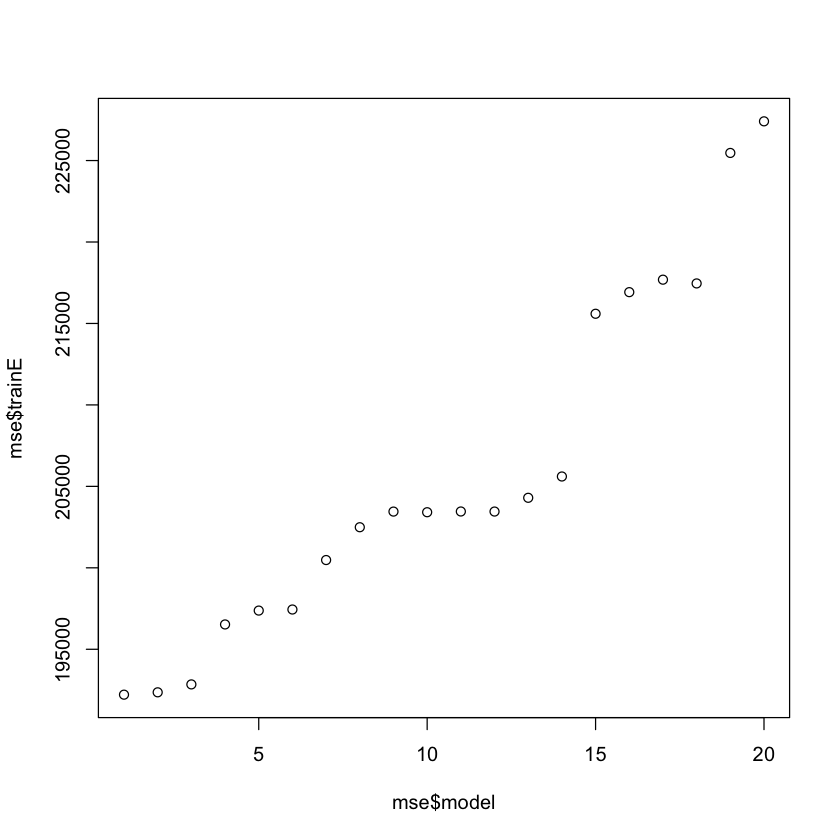

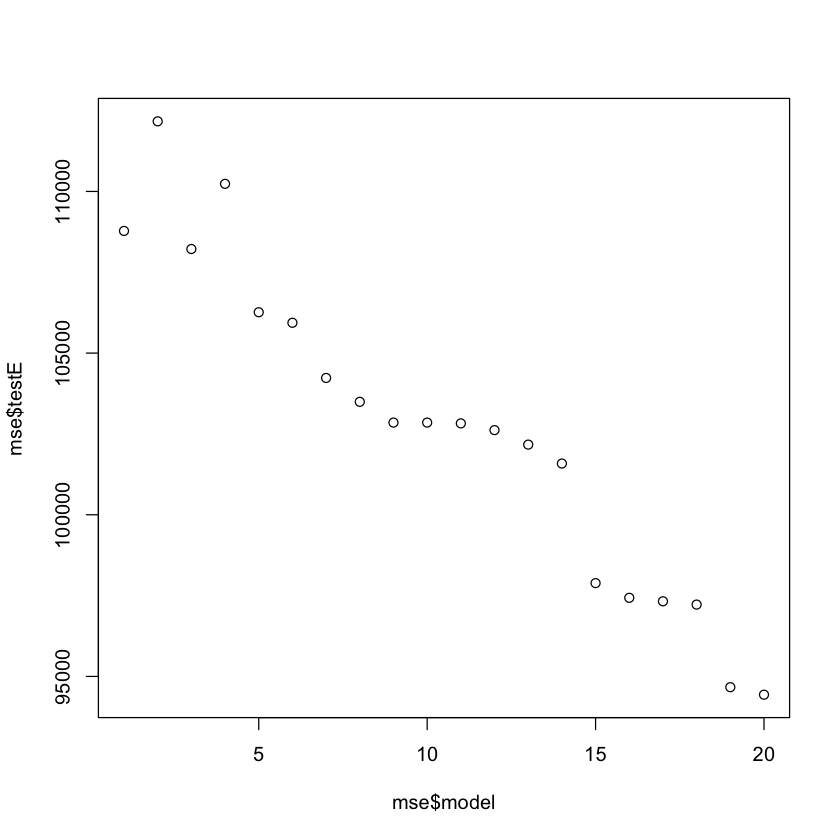

In [84]:
regfit.r = regsubsets(y~.,df,subset=train,nvmax=20)
regr.summary = summary(regfit.r)
regr.summary

regr.summary$which

#1
lm.fit1 = lm(y~x, data=df, subset=train)
train1 = mean((df$y-predict(lm.fit1,df))[-train]^2) 
test1 = mean((df$y-predict(lm.fit1,df))[train]^2) 

#2
lm.fit2 = lm(y~h+g, data=df, subset=train)
train2 = mean((df$y-predict(lm.fit2,df))[-train]^2) 
test2 = mean((df$y-predict(lm.fit2,df))[train]^2) 
 
#3
lm.fit3 = lm(y~h+g+x, data=df, subset=train)
train3 = mean((df$y-predict(lm.fit3,df))[-train]^2) 
test3 = mean((df$y-predict(lm.fit3,df))[train]^2) 

#4
lm.fit4 = lm(y~h+g+p+v, data=df, subset=train)
train4 = mean((df$y-predict(lm.fit4,df))[-train]^2) 
test4 = mean((df$y-predict(lm.fit4,df))[train]^2) 

#5
lm.fit5 = lm(y~h+g+p+v+x, data=df, subset=train)
train5 = mean((df$y-predict(lm.fit5,df))[-train]^2) 
test5 = mean((df$y-predict(lm.fit5,df))[train]^2) 

#6
lm.fit6 = lm(y~h+g+p+v+x+c, data=df, subset=train)
train6 = mean((df$y-predict(lm.fit6,df))[-train]^2) 
test6 = mean((df$y-predict(lm.fit6,df))[train]^2) 

#7
lm.fit7 = lm(y~h+g+p+v+x+c+s, data=df, subset=train)
train7 = mean((df$y-predict(lm.fit7,df))[-train]^2) 
test7 = mean((df$y-predict(lm.fit7,df))[train]^2) 

#8
lm.fit8 = lm(y~h+g+x+k+o+p+v+s, data=df, subset=train)
train8 = mean((df$y-predict(lm.fit8,df))[-train]^2) 
test8 = mean((df$y-predict(lm.fit8,df))[train]^2) 

#9
lm.fit9 = lm(y~x+c+g+h+k+o+p+s+v, data=df, subset=train)
train9 = mean((df$y-predict(lm.fit9,df))[-train]^2) 
test9 = mean((df$y-predict(lm.fit9,df))[train]^2) 

#10
lm.fit10 = lm(y~x+c+g+h+k+o+p+s+v+d, data=df, subset=train)
train10 = mean((df$y-predict(lm.fit10,df))[-train]^2) 
test10 = mean((df$y-predict(lm.fit10,df))[train]^2) 

#11
lm.fit11 = lm(y~x+c+g+h+k+o+p+s+v+d+j, data=df, subset=train)
train11 = mean((df$y-predict(lm.fit11,df))[-train]^2) 
test11 = mean((df$y-predict(lm.fit11,df))[train]^2) 

#12
lm.fit12 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z, data=df, subset=train)
train12 = mean((df$y-predict(lm.fit12,df))[-train]^2) 
test12 = mean((df$y-predict(lm.fit12,df))[train]^2) 

#13
lm.fit13 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q, data=df, subset=train)
train13 = mean((df$y-predict(lm.fit13,df))[-train]^2) 
test13 = mean((df$y-predict(lm.fit13,df))[train]^2) 

#14
lm.fit14 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i, data=df, subset=train)
train14 = mean((df$y-predict(lm.fit14,df))[-train]^2) 
test14 = mean((df$y-predict(lm.fit14,df))[train]^2) 

#15
lm.fit15 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f, data=df, subset=train)
train15 = mean((df$y-predict(lm.fit15,df))[-train]^2) 
test15 = mean((df$y-predict(lm.fit15,df))[train]^2) 

#16
lm.fit16 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f+r, data=df, subset=train)
train16 = mean((df$y-predict(lm.fit16,df))[-train]^2) 
test16 = mean((df$y-predict(lm.fit16,df))[train]^2) 

#17
lm.fit17 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f+r+t, data=df, subset=train)
train17 = mean((df$y-predict(lm.fit17,df))[-train]^2) 
test17 = mean((df$y-predict(lm.fit17,df))[train]^2) 

#18
lm.fit18 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f+r+t+w, data=df, subset=train)
train18 = mean((df$y-predict(lm.fit18,df))[-train]^2) 
test18 = mean((df$y-predict(lm.fit18,df))[train]^2) 

#19
lm.fit19 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f+r+t+w+u, data=df, subset=train)
train19 = mean((df$y-predict(lm.fit19,df))[-train]^2) 
test19 = mean((df$y-predict(lm.fit19,df))[train]^2) 

#20
lm.fit20 = lm(y~x+c+g+h+k+o+p+s+v+d+j+z+q+i+f+r+t+w+u+l, data=df, subset=train)
train20 = mean((df$y-predict(lm.fit20,df))[-train]^2) 
test20 = mean((df$y-predict(lm.fit20,df))[train]^2) 

mse = data.frame(trainE = c(train1,train2,train3,train4,train5,train6,train7,train8,train9,train10,train11,train12,train13,train14,train15,train16,train17,train18,train19,train20),
          testE = c(test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15,test16,test17,test18,test19,test20),
                model=c(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20))

plot(mse$model,mse$trainE)
plot(mse$model,mse$testE)


c) Identify the best model according the test MSE. How does this model compare to the actual model used to simulate the dataset?

*Note: If the model identified contains only an intercept or all of the features, then generate a new dataset (i.e. repeat part a with a different random seed) until the test set MSE is minimized for an intermediate model size.*

In [ ]:
# WRITE YOUR CODE HERE



> *Write your response here* 
> 

**DUE:** 5pm EST, April 15th, 2022

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here. 
> *Someone's Name*